# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN

### 1.1 Generating dataset

In [68]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [69]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [70]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [71]:
no_training_epochs = 5

### 1.3 Data examination

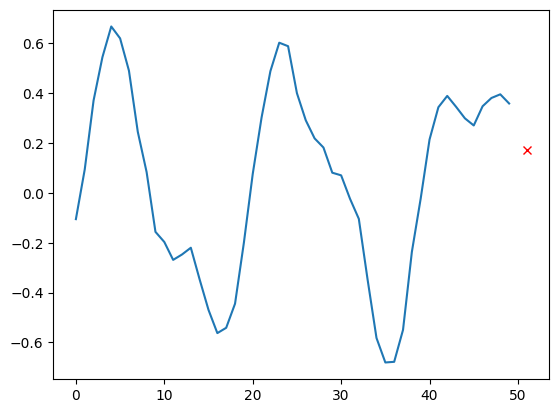

In [72]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [73]:
# Model definition
from keras.models import Sequential
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
# Model building
from keras.optimizers import Adam
learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [75]:
model_linear.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2900 - mean_squared_error: 0.2900 - val_loss: 0.0850 - val_mean_squared_error: 0.0850
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0184 - val_mean_squared_error: 0.0184


In [77]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

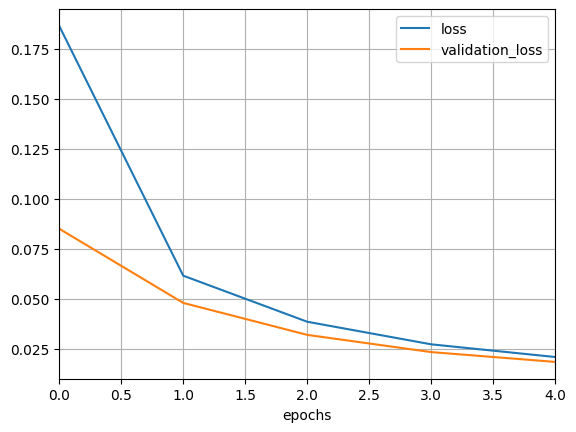

In [78]:
plot_function(history_linear)

In [79]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.0186746995896101
Test MSE:  0.0186746995896101


### 1.5 Simple RNN Model

In [80]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [82]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3931 - mean_squared_error: 0.3931 - val_loss: 0.3569 - val_mean_squared_error: 0.3569
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3381 - mean_squared_error: 0.3381 - val_loss: 0.3130 - val_mean_squared_error: 0.3130
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3026 - mean_squared_error: 0.3026 - val_loss: 0.2713 - val_mean_squared_error: 0.2713
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2606 - mean_squared_error: 0.2606 - val_loss: 0.2322 - val_mean_squared_error: 0.2322
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2211 - mean_squared_error: 0.2211 - val_loss: 0.1973 - val_mean_squared_error: 0.1973


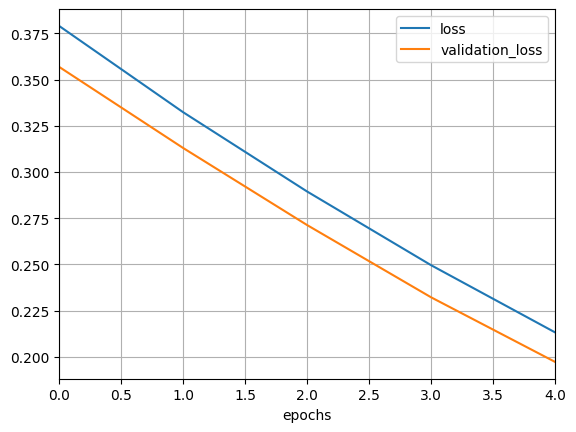

In [83]:
plot_function(history_simple_rnn)

In [84]:
score = model_simple_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.1983759105205536
Test MSE:  0.1983759105205536


### 1.5 Deep RNN Model

In [85]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [86]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [87]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


In [88]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.0033860253170132637
Test MSE:  0.0033860253170132637


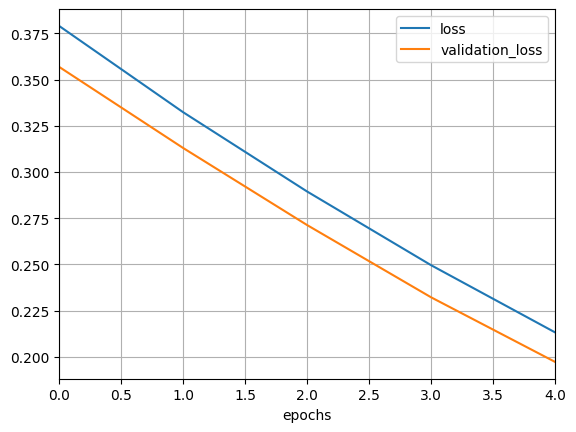

In [89]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [90]:
import keras

import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [91]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

### 2.2 - Dataset examination

In [92]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [93]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [94]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [95]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [96]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [97]:
optimizer = Adam(learning_rate = 0.001)

In [98]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [99]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4959 - loss: 0.7038 - val_accuracy: 0.5028 - val_loss: 0.6931
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.5123 - loss: 0.6949 - val_accuracy: 0.5062 - val_loss: 0.6930
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4969 - loss: 0.6958 - val_accuracy: 0.4938 - val_loss: 0.6937
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.4915 - loss: 0.6953 - val_accuracy: 0.5236 - val_loss: 0.6942
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.5046 - loss: 0.6951 - val_accuracy: 0.4948 - val_loss: 0.6930


In [100]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.6930432915687561
Test accuracy:  50.019997358322144 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

In [103]:
model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate = 0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5297 - loss: 0.6893 - val_accuracy: 0.5432 - val_loss: 0.6912
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5485 - loss: 0.6812 - val_accuracy: 0.5638 - val_loss: 0.6656
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6348 - loss: 0.6397 - val_accuracy: 0.7640 - val_loss: 0.5055
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7859 - loss: 0.4723 - val_accuracy: 0.8064 - val_loss: 0.4204
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8298 - loss: 0.3932 - val_accuracy: 0.8184 - val_loss: 0.4103
Test loss: 0.39839115738868713
Test accuracy:  81.90799951553345 %


In [104]:

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate = 0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5158 - loss: 0.6889 - val_accuracy: 0.7584 - val_loss: 0.5211
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7861 - loss: 0.4592 - val_accuracy: 0.8296 - val_loss: 0.3836
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8439 - loss: 0.3539 - val_accuracy: 0.8320 - val_loss: 0.3751
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8558 - loss: 0.3247 - val_accuracy: 0.8336 - val_loss: 0.3701
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8708 - loss: 0.3069 - val_accuracy: 0.8332 - val_loss: 0.3821
Test loss: 0.37068358063697815
Test accuracy:  83.29600095748901 %


In [105]:
model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate = 0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5358 - loss: 0.6861 - val_accuracy: 0.7706 - val_loss: 0.4932
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7995 - loss: 0.4338 - val_accuracy: 0.8224 - val_loss: 0.3924
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8452 - loss: 0.3497 - val_accuracy: 0.8276 - val_loss: 0.3826
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8556 - loss: 0.3258 - val_accuracy: 0.8320 - val_loss: 0.3704
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8638 - loss: 0.3120 - val_accuracy: 0.8296 - val_loss: 0.3910
Test loss: 0.3692916929721832
Test accuracy:  83.61200094223022 %


In [107]:
model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate = 0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5196 - loss: 0.6957 - val_accuracy: 0.7226 - val_loss: 0.5753
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7806 - loss: 0.4771 - val_accuracy: 0.8248 - val_loss: 0.3952
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8408 - loss: 0.3591 - val_accuracy: 0.8328 - val_loss: 0.3772
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8604 - loss: 0.3289 - val_accuracy: 0.8366 - val_loss: 0.3777
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8640 - loss: 0.3161 - val_accuracy: 0.8290 - val_loss: 0.3913
Test loss: 0.37993037700653076
Test accuracy:  82.97600150108337 %


**Summary:**

It seems that the accuracy is little bit better with the use of GRU compared to LSTM. The learning time is slightly longer with use of LSTM. When connecting GRU and LSTM layers in model, the accuracy is almost simillar to solely GRU model.